In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [109]:
DATA_DAY_MINUS_1 = "../data/round-2-island-data-bottle/prices_round_2_day_-1.csv"
DATA_DAY_0 = "../data/round-2-island-data-bottle/prices_round_2_day_0.csv"
DATA_DAY_1 = "../data/round-2-island-data-bottle/prices_round_2_day_1.csv"

df0 = pd.read_csv(DATA_DAY_MINUS_1, sep=';')
df1 = pd.read_csv(DATA_DAY_0, sep=';')
df2 =  pd.read_csv(DATA_DAY_1, sep=';')

df = pd.concat([df0, df1, df2])
df.set_index(['day', 'timestamp', 'product'], inplace=True)
df 

bid_price_1  bid_volume_1  bid_price_2  \
day timestamp product                                                    
-1  0         CROISSANTS               4304           112          NaN   
              JAMS                     6670            66       6669.0   
              SQUID_INK                2005             1       2002.0   
              PICNIC_BASKET1          59284            20      59283.0   
              PICNIC_BASKET2          30606            20      30605.0   
...                                     ...           ...          ...   
 1  999900    JAMS                     6519           204          NaN   
              RAINFOREST_RESIN         9995            20          NaN   
              SQUID_INK                1799            20          NaN   
              PICNIC_BASKET1          58713            15      58712.0   
              PICNIC_BASKET2          30100            36          NaN   

                                bid_volume_2  bid_price_3  bid_volume_3  \
day timestamp product                                                     
-1  0         CROISSANTS                 NaN          NaN           NaN   
              JAMS                     137.0          NaN           NaN   
              SQUID_INK                 31.0          NaN           NaN   
              PICNIC_BASKET1            18.0          NaN           NaN   
              PICNIC_BASKET2            18.0          NaN           NaN   
...                                      ...          ...           ...   
 1  999900    JAMS                       NaN          NaN           NaN   
              RAINFOREST_RESIN           NaN          NaN           NaN   
              SQUID_INK                  NaN          NaN           NaN   
              PICNIC_BASKET1            21.0          NaN           NaN   
              PICNIC_BASKET2             NaN          NaN           NaN   

                                ask_price_1  ask_volume_1  ask_price_2  \
day timestamp product                                                    
-1  0         CROISSANTS               4305           112          NaN   
              JAMS                     6671            66       6672.0   
              SQUID_INK                2006            31          NaN   
              PICNIC_BASKET1          59294             2      59295.0   
              PICNIC_BASKET2          30612            20      30613.0   
...                                     ...           ...          ...   
 1  999900    JAMS                     6521           204          NaN   
              RAINFOREST_RESIN        10005            20          NaN   
              SQUID_INK                1802            20          NaN   
              PICNIC_BASKET1          58724            15      58725.0   
              PICNIC_BASKET2          30107            36          NaN   

                                ask_volume_2  ask_price_3  ask_volume_3  \
day timestamp product                                                     
-1  0         CROISSANTS                 NaN          NaN           NaN   
              JAMS                     137.0          NaN           NaN   
              SQUID_INK                  NaN          NaN           NaN   
              PICNIC_BASKET1            36.0          NaN           NaN   
              PICNIC_BASKET2            18.0          NaN           NaN   
...                                      ...          ...           ...   
 1  999900    JAMS                       NaN          NaN           NaN   
              RAINFOREST_RESIN           NaN          NaN           NaN   
              SQUID_INK                  NaN          NaN           NaN   
              PICNIC_BASKET1            21.0          NaN           NaN   
              PICNIC_BASKET2             NaN          NaN           NaN   

                                mid_price  profit_and_loss  
day timestamp product                                       
-1  0         CROISSANTS        

In [119]:
pprint(df.index.get_level_values(2).unique().values.tolist())

['CROISSANTS',
 'JAMS',
 'SQUID_INK',
 'PICNIC_BASKET1',
 'PICNIC_BASKET2',
 'RAINFOREST_RESIN',
 'DJEMBES',
 'KELP']


In [147]:
(df["ask_price_1"] - df["bid_price_1"]).groupby("product").describe()

,count,mean,std,min,25%,50%,75%,max
product,,,,,,,,
CROISSANTS,30000.0,1.207733,0.405692,1.0,1.0,1.0,1.0,2.0
DJEMBES,30000.0,1.264667,0.441163,1.0,1.0,1.0,2.0,2.0
JAMS,30000.0,1.628333,0.483258,1.0,1.0,2.0,2.0,2.0
KELP,30000.0,2.716300,0.882179,1.0,2.0,3.0,3.0,4.0
PICNIC_BASKET1,30000.0,9.245200,2.004431,1.0,9.0,9.0,11.0,12.0
PICNIC_BASKET2,30000.0,5.225933,1.141285,1.0,5.0,5.0,6.0,7.0
RAINFOREST_RESIN,30000.0,6.771800,2.472393,2.0,6.0,8.0,8.0,10.0
SQUID_INK,30000.0,2.604367,0.838092,1.0,2.0,3.0,3.0,4.0


In [155]:
PRODUCTS = set(["RAINFOREST_RESIN"])
# PRODUCTS = set([""])

ink = df[df.index.isin(PRODUCTS, level=2)]
# (ink["ask_price_1"] - ink["bid_price_1"]).groupby("product").describe()
ink

bid_price_1  bid_volume_1  bid_price_2  \
day timestamp product                                                    
-1  0         RAINFOREST_RESIN        10002             1       9996.0   
    100       RAINFOREST_RESIN         9996             2       9995.0   
    200       RAINFOREST_RESIN         9995            20          NaN   
    300       RAINFOREST_RESIN         9996             2       9995.0   
    400       RAINFOREST_RESIN         9996             2       9995.0   
...                                     ...           ...          ...   
 1  999500    RAINFOREST_RESIN         9998             2       9996.0   
    999600    RAINFOREST_RESIN         9995            24          NaN   
    999700    RAINFOREST_RESIN         9996             1       9995.0   
    999800    RAINFOREST_RESIN         9996             2       9995.0   
    999900    RAINFOREST_RESIN         9995            20          NaN   

                                bid_volume_2  bid_price_3  bid_volume_3  \
day timestamp product                                                     
-1  0         RAINFOREST_RESIN           2.0       9995.0          29.0   
    100       RAINFOREST_RESIN          22.0          NaN           NaN   
    200       RAINFOREST_RESIN           NaN          NaN           NaN   
    300       RAINFOREST_RESIN          29.0          NaN           NaN   
    400       RAINFOREST_RESIN          25.0          NaN           NaN   
...                                      ...          ...           ...   
 1  999500    RAINFOREST_RESIN           1.0       9995.0          24.0   
    999600    RAINFOREST_RESIN           NaN          NaN           NaN   
    999700    RAINFOREST_RESIN          29.0          NaN           NaN   
    999800    RAINFOREST_RESIN          22.0          NaN           NaN   
    999900    RAINFOREST_RESIN           NaN          NaN           NaN   

                                ask_price_1  ask_volume_1  ask_price_2  \
day timestamp product                                                    
-1  0         RAINFOREST_RESIN        10004             2      10005.0   
    100       RAINFOREST_RESIN        10004             2      10005.0   
    200       RAINFOREST_RESIN        10005            20          NaN   
    300       RAINFOREST_RESIN        10004             2      10005.0   
    400       RAINFOREST_RESIN        10004             2      10005.0   
...                                     ...           ...          ...   
 1  999500    RAINFOREST_RESIN        10004             1      10005.0   
    999600    RAINFOREST_RESIN        10005            24          NaN   
    999700    RAINFOREST_RESIN        10002             7      10004.0   
    999800    RAINFOREST_RESIN        10004             2      10005.0   
    999900    RAINFOREST_RESIN        10005            20          NaN   

                                ask_volume_2  ask_price_3  ask_volume_3  \
day timestamp product                                                     
-1  0         RAINFOREST_RESIN          29.0          NaN           NaN   
    100       RAINFOREST_RESIN          22.0          NaN           NaN   
    200       RAINFOREST_RESIN           NaN          NaN           NaN   
    300       RAINFOREST_RESIN          29.0          NaN           NaN   
    400       RAINFOREST_RESIN          25.0          NaN           NaN   
...                                      ...          ...           ...   
 1  999500    RAINFOREST_RESIN          24.0          NaN           NaN   
    999600    RAINFOREST_RESIN           NaN          NaN           NaN   
    999700    RAINFOREST_RESIN           1.0      10005.0          29.0   
    999800    RAINFOREST_RESIN          22.0          NaN           NaN   
    999900    RAINFOREST_RESIN           NaN          NaN           NaN   

                                mid_price  profit_and_loss  
day timestamp product                                       
-1  0         RAINFOREST_RESIN  

<AxesSubplot:xlabel='timestamp', ylabel='mid_price'>

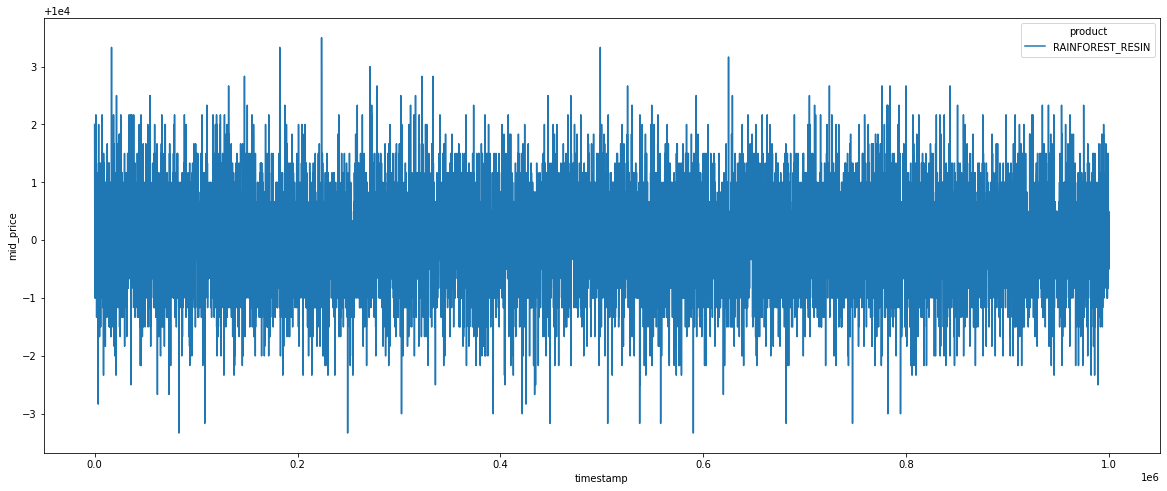

In [156]:
plt.rcParams["figure.figsize"] = (20,8)
sns.lineplot(ink,
             x="timestamp",
             y="mid_price",
             hue="product",
             errorbar=None,
             )

In [165]:
PRODUCTS = set(["SQUID_INK"])

ink = df[df.index.isin(PRODUCTS, level=2)]
ink

bid_price_1  bid_volume_1  bid_price_2  bid_volume_2  \
day timestamp product                                                           
-1  0         SQUID_INK         2005             1       2002.0          31.0   
    100       SQUID_INK         2004            24          NaN           NaN   
    200       SQUID_INK         2003            22          NaN           NaN   
    300       SQUID_INK         2003            31          NaN           NaN   
    400       SQUID_INK         2004            27          NaN           NaN   
...                              ...           ...          ...           ...   
 1  999500    SQUID_INK         1802             1       1800.0          25.0   
    999600    SQUID_INK         1801             2       1800.0          24.0   
    999700    SQUID_INK         1800            29          NaN           NaN   
    999800    SQUID_INK         1800            24          NaN           NaN   
    999900    SQUID_INK         1799            20          NaN           NaN   

                         bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
day timestamp product                                                           
-1  0         SQUID_INK          NaN           NaN         2006            31   
    100       SQUID_INK          NaN           NaN         2007            24   
    200       SQUID_INK          NaN           NaN         2006            20   
    300       SQUID_INK          NaN           NaN         2006            31   
    400       SQUID_INK          NaN           NaN         2007            27   
...                              ...           ...          ...           ...   
 1  999500    SQUID_INK          NaN           NaN         1803            25   
    999600    SQUID_INK          NaN           NaN         1803            24   
    999700    SQUID_INK          NaN           NaN         1803            30   
    999800    SQUID_INK          NaN           NaN         1802             8   
    999900    SQUID_INK          NaN           NaN         1802            20   

                         ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  \
day timestamp product                                                           
-1  0         SQUID_INK          NaN           NaN          NaN           NaN   
    100       SQUID_INK          NaN           NaN          NaN           NaN   
    200       SQUID_INK          NaN           NaN          NaN           NaN   
    300       SQUID_INK          NaN           NaN          NaN           NaN   
    400       SQUID_INK          NaN           NaN          NaN           NaN   
...                              ...           ...          ...           ...   
 1  999500    SQUID_INK          NaN           NaN          NaN           NaN   
    999600    SQUID_INK          NaN           NaN          NaN           NaN   
    999700    SQUID_INK          NaN           NaN          NaN           NaN   
    999800    SQUID_INK       1803.0          24.0          NaN           NaN   
    999900    SQUID_INK          NaN           NaN          NaN           NaN   

                         mid_price  profit_and_loss  
day timestamp product                                
-1  0         SQUID_INK     2005.5              0.0  
    100       SQUID_INK     2005.5              0.0  
    200       SQUID_INK     2004.5              0.0  
    300       SQUID_INK     2004.5              0.0  
    400       SQUID_INK     2005.5              0.0  
...                            ...              ...  
 1  999500    SQUID_INK     1802.5              0.0  
    999600    SQUID_INK     1802.0              0.0  
    999700    SQUID_INK     1801.5              0.0  
    999800    SQUID_INK     1801.0              0.0  
    999900    SQUID_INK     1800.5              0.0  

[30000 rows x 14 columns]

In [215]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (30,20)

# Compute rolling moving average and rolling standard deviation (both with window=15)
ink["mid_ma"] = ink["mid_price"].rolling(15).mean()
ink["mid_std"] = ink["mid_price"].rolling(15).std()

ink = ink[ink.index.isin([0], level=0)]

# Use your provided code to extract timestamps when mid_std is above its median.
signals = ink[ink["mid_std"] > ink["mid_std"].median()]
signals

# Create two vertically stacked subplots with a shared x-axis.
# Top plot (ax1) is for mid_price and mid_ma, bottom (ax2) for mid_std.
fig, (ax1, ax2) = plt.subplots(2, 1, 
                                gridspec_kw={'height_ratios': [3, 1]}, 
                                sharex=True, 
                                figsize=(30,20))

# Top graph: Plot mid_price and mid_ma.
sns.lineplot(data=ink, x="timestamp", y="mid_price", errorbar=None, ax=ax1)
sns.lineplot(data=ink, x="timestamp", y="mid_ma", errorbar=None, ax=ax1)
sns.lineplot(data=ink, x="timestamp", y="mid_std", errorbar=None, ax=ax2)
sns.scatterplot(data=signals, x="timestamp", y="mid_price", ax=ax1, marker='^', color="green")

<AxesSubplot:xlabel='timestamp', ylabel='mid_price'>